# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
#Importação das Bibliotecas.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
#Lendo CSV e Amostra de dados.

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
#Separando a variável 'munResLat' [mínimo < -10.5 < máximo].

Ex1 = pd.cut(sinasc_raw['munResLat'],[sinasc_raw['munResLat'].min()-1,-10.5,sinasc_raw['munResLat'].max()+1])
Ex1.value_counts().to_frame()

,munResLat
"(-10.5, -7.769]",14034
"(-14.5, -10.5]",12993


In [4]:
#Aplicando Groupby usando como chave 'munResLat', nas variáveis 'munResArea', 'munResAlt'.

sinasc_raw.groupby(Ex1)[['munResArea', 'munResAlt']].agg([('Soma','sum'),
                                                          ('Média','mean'),
                                                          ('Mínimo','min'),
                                                          ('Máximo','max'),
                                                          ('Mediana','median'),
                                                          ('Desvio Padrão','std'),
                                                          ('Variância','var')])

munResArea                                               \
                         Soma         Média   Mínimo     Máximo    Mediana   
munResLat                                                                    
(-14.5, -10.5]   8.360143e+07   6434.344207  459.978  24855.724   5067.384   
(-10.5, -7.769]  3.137711e+08  22357.926110  965.676  34096.394  34096.394   

                                             munResAlt                     \
                Desvio Padrão     Variância       Soma       Média Mínimo   
munResLat                                                                   
(-14.5, -10.5]    5688.822159  3.236270e+07  3310445.0  254.786808  133.0   
(-10.5, -7.769]  14488.909375  2.099285e+08  1530415.0  109.050520   85.0   

                                                            
                Máximo Mediana Desvio Padrão     Variância  
munResLat                                                   
(-14.5, -10.5]   595.0   191.0    139.771518  19536.077237  
(-10.5, -7.769]  192.0    87.0     30.071422    904.290400

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
#Separando a variável 'munResArea' [mínimo < 3000 < máximo].

Ex2 = pd.cut(sinasc_raw['munResArea'],[sinasc_raw['munResArea'].min()-1,3000,sinasc_raw['munResArea'].max()+1])

Ex2.value_counts()

(3000.0, 34097.394]    21808
(458.978, 3000.0]       5219
Name: munResArea, dtype: int64

In [6]:
#Aplicando Groupby usando como chave 'munResArea', nas variáveis 'QTDFILVIVO', 'QTDFILMORT'.

sinasc_raw.groupby(Ex2)[['QTDFILVIVO', 'QTDFILMORT']].agg([('Soma','sum'),
                                                           ('Média','mean'),
                                                           ('Mínimo','min'),
                                                           ('Máximo','max'),
                                                           ('Mediana','median'),
                                                           ('Desvio Padrão','std'),
                                                           ('Variância','var')])

QTDFILVIVO                                                \
                          Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResArea                                                                     
(458.978, 3000.0]       4773.0  0.924284    0.0   30.0     1.0      1.075442   
(3000.0, 34097.394]    22053.0  1.086890    0.0   14.0     1.0      1.191750   

                              QTDFILMORT                                  \
                    Variância       Soma     Média Mínimo Máximo Mediana   
munResArea                                                                 
(458.978, 3000.0]    1.156575     1260.0  0.244803    0.0    4.0     0.0   
(3000.0, 34097.394]  1.420268     5383.0  0.272116    0.0   28.0     0.0   

                                             
                    Desvio Padrão Variância  
munResArea                                   
(458.978, 3000.0]        0.551215  0.303838  
(3000.0, 34097.394]      0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
#Separando a variável 'munResAlt' [mínimo < 255 < máximo].

Ex3 = pd.cut(sinasc_raw['munResAlt'],[sinasc_raw['munResAlt'].min()-1,255,sinasc_raw['munResAlt'].max()+1])

Ex3.value_counts()

(84.0, 255.0]     23184
(255.0, 596.0]     3843
Name: munResAlt, dtype: int64

In [8]:
#Aplicando Groupby usando como chave 'munResAlt', nas variáveis 'CONSULTAS', 'ESTCIVMAE'.

sinasc_raw.groupby(Ex3)[['CONSULTAS', 'ESTCIVMAE']].agg([('Soma','sum'),
                                                         ('Média','mean'),
                                                         ('Mínimo','min'),
                                                         ('Máximo','max'),
                                                         ('Mediana','median'),
                                                         ('Desvio Padrão','std'),
                                                         ('Variância','var')])

CONSULTAS                                                \
                    Soma     Média Mínimo Máximo Mediana Desvio Padrão   
munResAlt                                                                
(84.0, 255.0]      82340  3.551587      1      9     4.0      0.811222   
(255.0, 596.0]     14322  3.726776      1      9     4.0      0.612025   

                         ESTCIVMAE                                  \
               Variância      Soma     Média Mínimo Máximo Mediana   
munResAlt                                                            
(84.0, 255.0]   0.658081   60074.0  2.624694    1.0    9.0     2.0   
(255.0, 596.0]  0.374574    7909.0  2.069335    1.0    9.0     2.0   

                                        
               Desvio Padrão Variância  
munResAlt                               
(84.0, 255.0]       1.702731  2.899293  
(255.0, 596.0]      1.375623  1.892339

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [9]:
#Mapping

imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [10]:
#4. Renomeando os municípios de 'munResNome' para o map imediatas.

Ex4 = sinasc_raw.copy()
Ex4['munResNome'] = Ex4['munResNome'].map(imediatas)

Ex4['munResNome'].value_counts()

Porto Velho    10096
Ji-Paraná       4962
Cacoal          4603
Ariquemes       3233
Vilhena         2450
Jaru            1683
Name: munResNome, dtype: int64

Text(0, 0.5, 'Idade da Mãe')

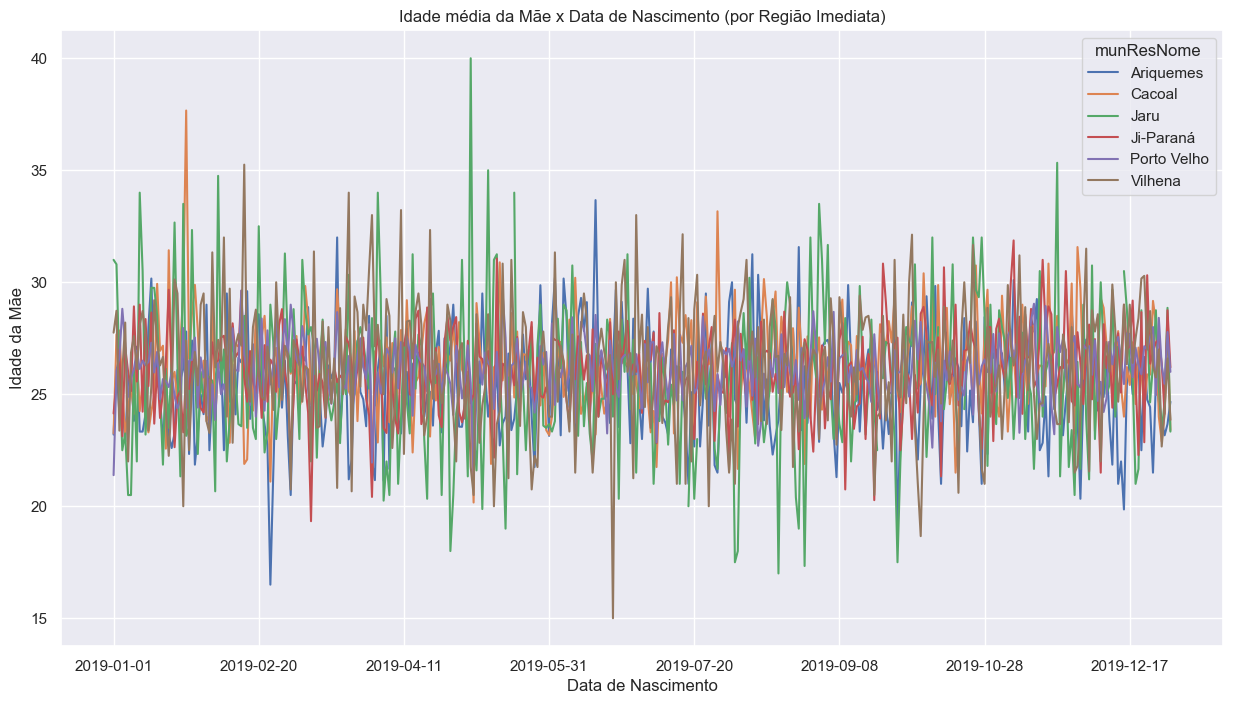

In [11]:
#4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia

Ex4.groupby(['DTNASC', 'munResNome'])['IDADEMAE'].mean().unstack().plot(figsize=(15,8))

plt.title("Idade média da Mãe x Data de Nascimento (por Região Imediata)")
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade da Mãe')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [12]:
#Mapping

IDH = {
    "Porto Velho": "IDH-M alto",                #
    "Ariquemes": "IDH-M alto",                  #
    "Ji-Paraná": "IDH-M alto",                  #
    "Cacoal": "IDH-M alto",                     # "IDH-M alto"
    "Pimenta Bueno": "IDH-M alto",              #
    "Rolim de Moura": "IDH-M alto",             #
    "Vilhena": "IDH-M alto",                    #
#################################################
    "Candeias do Jamari": "IDH-M médio",        #
    "Guajará-Mirim": "IDH-M médio",             #
    "Itapuã do Oeste": "IDH-M médio",           #
    "Alto Paraíso": "IDH-M médio",              #
    "Buritis": "IDH-M médio",                   #
    "Cacaulândia": "IDH-M médio",               #
    "Cujubim": "IDH-M médio",                   #
    "Monte Negro": "IDH-M médio",               #
    "Rio Crespo": "IDH-M médio",                #
    "Jaru": "IDH-M médio",                      #
    "Alvorada D'Oeste": "IDH-M médio",          #
    "Costa Marques": "IDH-M médio",             #
    "Mirante da Serra": "IDH-M médio",          #
    "Ouro Preto do Oeste": "IDH-M médio",       #
    "Presidente Médici": "IDH-M médio",         #
    "São Francisco do Guaporé": "IDH-M médio",  #
    "São Miguel do Guaporé": "IDH-M médio",     #
    "Teixeirópolis": "IDH-M médio",             # "IDH-M médio"
    "Urupá": "IDH-M médio",                     #
    "Vale do Paraíso": "IDH-M médio",           #
    "Alta Floresta D'Oeste": "IDH-M médio",     #
    "Castanheiras": "IDH-M médio",              #
    "Espigão D'Oeste": "IDH-M médio",           #
    "Ministro Andreazza": "IDH-M médio",        #
    "Nova Brasilândia D'Oeste": "IDH-M médio",  #
    "Novo Horizonte do Oeste": "IDH-M médio",   #
    "Parecis": "IDH-M médio",                   #
    "Primavera de Rondônia": "IDH-M médio",     #
    "Santa Luzia D'Oeste": "IDH-M médio",       #
    "São Felipe D'Oeste": "IDH-M médio",        #
    "Cabixi": "IDH-M médio",                    #
    "Cerejeiras": "IDH-M médio",                #
    "Chupinguaia": "IDH-M médio",               #
    "Colorado do Oeste": "IDH-M médio",         #
    "Corumbiara": "IDH-M médio",                #
    "Pimenteiras do Oeste": "IDH-M médio",      #
################################################# 
    "Nova Mamoré": "IDH-M baixo",               #
    "Campo Novo de Rondônia": "IDH-M baixo",    #
    "Governador Jorge Teixeira": "IDH-M baixo", #
    "Machadinho D'Oeste": "IDH-M baixo",        #
    "Theobroma": "IDH-M baixo",                 # "IDH-M baixo"
    "Vale do Anari": "IDH-M baixo",             #
    "Nova União": "IDH-M baixo",                #
    "Seringueiras": "IDH-M baixo",              #
    "Alto Alegre dos Parecis": "IDH-M baixo"    #
}

In [13]:
# 5.1 Adicionando Coluna IDH fazendo mapping de 'munResNome' do map IDH.

Ex5_1 = sinasc_raw.copy()
Ex5_1['IDH'] = Ex5_1['munResNome'].map(IDH)
Ex5_1['IDH'].value_counts()

IDH-M alto     16855
IDH-M médio     8346
IDH-M baixo     1826
Name: IDH, dtype: int64

Text(0, 0.5, 'Quantidade de Mães')

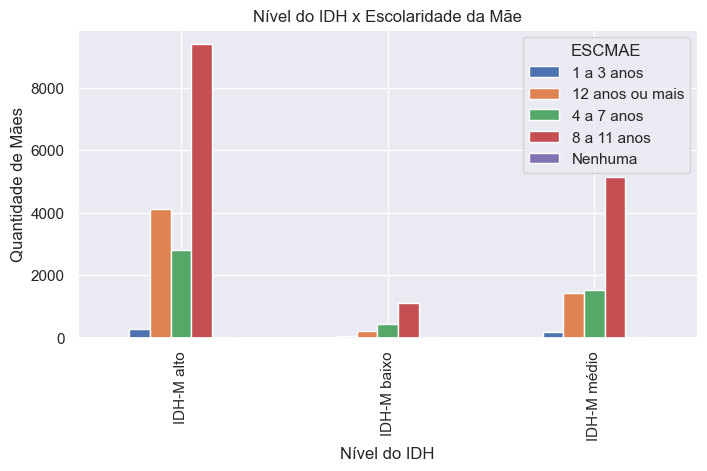

In [14]:
# 5.1 Utilize a tabela e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

Ex5_1.groupby(['IDH', 'ESCMAE'])['ESCMAE'].count().unstack().plot.bar(figsize=(8,4))

plt.title("Nível do IDH x Escolaridade da Mãe")
plt.xlabel("Nível do IDH")
plt.ylabel("Quantidade de Mães")

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [15]:
#Mapping

IFDM = {
    "Ariquemes": 0.7746,                 #
    "Vilhena": 0.7465,                   #
    "Pimenta Bueno": 0.7383,             #
    "Porto Velho": 0.7257,               #
    "Ji-Paraná": 0.7117,                 #
    "Cacoal": 0.7111,                    #
    "Santa Luzia D'Oeste": 0.6850,       #
    "Rolim de Moura": 0.6785,            #
    "Chupinguaia": 0.6766,               #
    "São Miguel do Guaporé": 0.6699,     #
    "Pimenteiras do Oeste": 0.6501,      #
    "Teixeirópolis": 0.6500,             #
    "Colorado do Oeste": 0.6473,         # "Desenvolvimento moderado"
    "Jaru": 0.6450,                      #
    "Rio Crespo": 0.6430,                #
    "Primavera de Rondônia": 0.6384,     #
    "Alta Floresta D'Oeste": 0.6337,     #
    "Ouro Preto do Oeste": 0.6261,       #
    "São Francisco do Guaporé": 0.6214,  #
    "Candeias do Jamari": 0.6199,        #
    "Buritis": 0.6199,                   #
    "São Felipe D'Oeste": 0.6153,        #
    "Presidente Médici": 0.6140,         #
    "Cerejeiras": 0.6137,                #
    "Monte Negro": 0.6016,               #
    "Urupá": 0.6006,                     #
##########################################
    "Espigão D'Oeste": 0.5973,           #
    "Seringueiras": 0.5922,              #
    "Alvorada D'Oeste": 0.5919,          #
    "Itapuã do Oeste": 0.5903,           #
    "Cabixi": 0.5887,                    #
    "Novo Horizonte do Oeste": 0.5858,   #
    "Nova Brasilândia D'Oeste": 0.5857,  #
    "Vale do Paraíso": 0.5818,           #
    "Corumbiara": 0.5759,                #
    "Alto Paraíso": 0.5735,              #
    "Cacaulândia": 0.5721,               #
    "Vale do Anari": 0.5710,             #
    "Ministro Andreazza": 0.5657,        #
    "Costa Marques": 0.5626,             # "Desenvolvimento regular"
    "Nova União": 0.5571,                #
    "Guajará-Mirim": 0.5541,             #
    "Mirante da Serra": 0.5519,          #
    "Parecis": 0.5502,                   #
    "Castanheiras": 0.5430,              #
    "Theobroma": 0.5405,                 #
    "Machadinho D'Oeste": 0.5322,        #
    "Campo Novo de Rondônia": 0.5272,    #
    "Nova Mamoré": 0.5084,               #
    "Cujubim": 0.5055,                   #
    "Alto Alegre dos Parecis": 0.5046,   #
    "Governador Jorge Teixeira": 0.4562  #
}

In [16]:
# 5.2 Adicionando Coluna IFDM e IFDM_CAT fazendo mapping de 'munResNome' do map IFDM.

Ex5_2 = sinasc_raw.copy()
Ex5_2['IFDM'] = Ex5_2['munResNome'].map(IFDM)
Ex5_2['IFDM_CAT'] = np.select([Ex5_2['IFDM'] >= 0.6,
                               Ex5_2['IFDM'] < 0.6],

                              ['Desenvolvimento moderado',
                               'Desenvolvimento regular'],

                              default=None)

Text(0, 0.5, 'Média de Idade da Mãe')

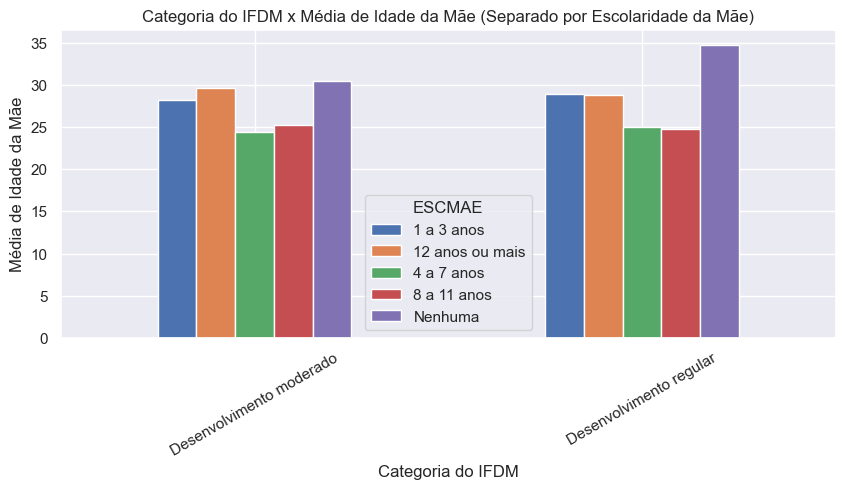

In [17]:
# 5.2 Utilize a tabela e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

Ex5_2.groupby(['IFDM_CAT', 'ESCMAE'])['IDADEMAE'].mean().unstack().plot.bar(figsize=(10,4))

plt.tick_params(axis='x', rotation=30)
plt.title("Categoria do IFDM x Média de Idade da Mãe (Separado por Escolaridade da Mãe)")
plt.xlabel("Categoria do IFDM")
plt.ylabel("Média de Idade da Mãe")

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [18]:
#Mapping

PIB = {
    "Porto Velho": 17912070,              #
    "Ji-Paraná": 3783972,                 #
    "Vilhena": 2831175,                   #
    "Ariquemes": 2579830,                 # "Acima de 1 Bilhão"
    "Cacoal": 2261644,                    #
    "Jaru": 1500890,                      #
    "Rolim de Moura": 1283434,            #
    "Pimenta Bueno": 1164877,             #
###########################################
    "Guajará-Mirim": 893000,              #
    "Ouro Preto do Oeste": 834000,        #
    "Buritis": 726000,                    #
    "Machadinho D'Oeste": 633000,         #
    "Espigão D'Oeste": 625000,            # "Acima de 500 Milhões"
    "São Miguel do Guaporé": 616000,      #
    "Candeias do Jamari": 548000,         #
    "Nova Mamoré": 529000,                #
    "Cerejeiras": 507000,                 #
###########################################
    "Alta Floresta D'Oeste": 496000,      #
    "Presidente Médici": 428000,          #
    "Cujubim": 385000,                    #
    "Nova Brasilândia D'Oeste": 360000,   # "Acima de 300 Milhões"
    "Alto Paraíso": 358000,               #
    "São Francisco do Guaporé": 353000,   #
    "Colorado do Oeste": 335000,          #
###########################################
    "Monte Negro": 219152,                #
    "Alto Alegre dos Parecis": 213410,    # "Acima de 200 Milhões"
    "Campo Novo de Rondônia": 208821,     #
    "Alvorada D'Oeste": 204098,           #
###########################################
    "Chupinguaia": 190331,                #
    "Corumbiara": 188218,                 #
    "Ministro Andreazza": 174633,         #
    "Urupá": 172143,                      #
    "Costa Marques": 171878,              #
    "Seringueiras": 169429,               #
    "Mirante da Serra": 163955,           # "Acima de 100 Milhões"
    "Governador Jorge Teixeira": 148027,  #
    "Theobroma": 140601,                  #
    "Santa Luzia D'Oeste": 135934,        #
    "Novo Horizonte do Oeste": 129399,    #
    "Itapuã do Oeste": 129351,            #
    "Vale do Paraíso": 116742,            #
    "Cacaulândia": 116635,                #
    "Cabixi": 113031,                     #
    "Vale do Anari": 105208,              #
###########################################
    "Nova União": 92346,                  #
    "Parecis": 80759,                     #
    "Rio Crespo": 76854,                  #
    "Pimenteiras do Oeste": 76756,        # "Até 100 Milhões"
    "Teixeirópolis": 72089,               #
    "São Felipe D'Oeste": 72084,          #
    "Castanheiras": 59779,                #
    "Primavera de Rondônia": 52908        #
}

In [19]:
# 5.3 Adicionando Coluna PIB e PIB_CAT fazendo mapping de 'munResNome' do map PIB.

Ex5_3 = sinasc_raw.copy()
Ex5_3['PIB'] = Ex5_3['munResNome'].map(PIB)
Ex5_3['PIB_CAT'] = np.select([Ex5_3['PIB'] >= 1000000,
                              Ex5_3['PIB'] >= 500000,
                              Ex5_3['PIB'] >= 300000,
                              Ex5_3['PIB'] >= 200000,
                              Ex5_3['PIB'] >= 100000,
                              Ex5_3['PIB'] < 100000],

                             ['Acima de 1 Bilhão',
                              'Acima de 500 Milhões',
                              'Acima de 300 Milhões',
                              'Acima de 200 Milhões',
                              'Acima de 100 Milhões',
                              'Até 100 Milhões'],

                             default=None)

Text(0, 0.5, 'Média de Filhos Vivos')

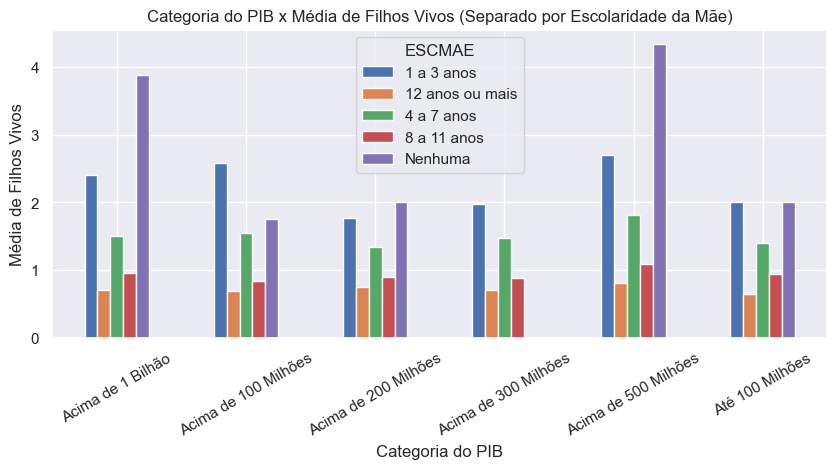

In [20]:
# 5.3 Utilize a tabela e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave

Ex5_3.groupby(['PIB_CAT', 'ESCMAE'])['QTDFILVIVO'].mean().unstack().plot.bar(figsize=(10,4))

plt.tick_params(axis='x', rotation=30)
plt.title("Categoria do PIB x Média de Filhos Vivos (Separado por Escolaridade da Mãe)")
plt.xlabel("Categoria do PIB")
plt.ylabel("Média de Filhos Vivos")